# Stats Project 6: Time Series Analysis

The statistics concept for this week is time series analysis. Since the electronics focus this week is on learning a completely new system (Cypress 5LP) I thought we'd use something completely different for statistics!

Let's grab some data from the Internet and apply time series analysis to that. Of course you can also apply the same concept to data you collect in the lab from any system you like, or data you collect in any other way.

Let's explore an example dealing with Weather! We are going to use time series of [Arctic Oscillation (AO)](http://en.wikipedia.org/wiki/Arctic_oscillation) and [North Atlantic Oscillation (NAO)](http://en.wikipedia.org/wiki/North_Atlantic_oscillation) data sets. If you're interested you can find another approach to this same data set described [here](http://earthpy.org/pandas-basics.html) (this is where I got the idea of using the AO and NAO data sets, as well as the basic intro to time series). 


In [1]:
%matplotlib inline
import matplotlib.pyplot as pl
import pandas as pd
import numpy as np
from datetime import datetime

pd.set_option('display.max_rows',15) # this limit maximum numbers of rows

In [2]:
#
# Grab some data from noaa about the AO. This actually pulls the live data from noaa.
#
url="http://www.cpc.ncep.noaa.gov/products/precip/CWlink/daily_ao_index/monthly.ao.index.b50.current.ascii"
dfAO=pd.read_csv(url, header=None, names=['year','month','AOValue'], delim_whitespace=True)
dfAO.head()

,year,month,AOValue
0,1950,1,-0.060310
1,1950,2,0.626810
2,1950,3,-0.008128
3,1950,4,0.555100
4,1950,5,0.071577


Text(0, 0.5, 'Value')

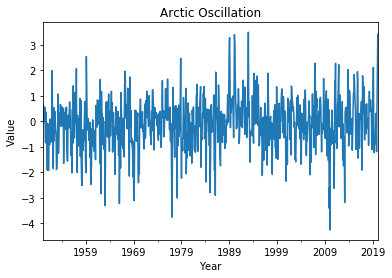

In [3]:
dates = pd.date_range(start = datetime(dfAO.year.values[0], dfAO.month.values[0],1), periods = dfAO.year.shape[0], freq='M')
AO = pd.Series(dfAO.AOValue.values, index=dates)
AO.plot()

pl.title('Arctic Oscillation')
pl.xlabel('Year')
pl.ylabel('Value')

Text(0, 0.5, 'Value')

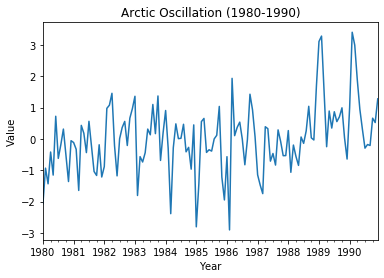

In [4]:
#
# you can zoom in!
#

AO['1980':'1990'].plot()
pl.title('Arctic Oscillation (1980-1990)')
pl.xlabel('Year')
pl.ylabel('Value')

Text(0, 0.5, 'Value')

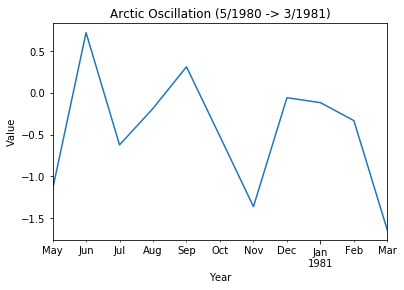

In [5]:
#
# or even more
#
AO['1980-05':'1981-03'].plot()
pl.title('Arctic Oscillation (5/1980 -> 3/1981)')
pl.xlabel('Year')
pl.ylabel('Value')

In [6]:
url="http://www.cpc.ncep.noaa.gov/products/precip/CWlink/pna/norm.nao.monthly.b5001.current.ascii"
dfNAO=pd.read_csv(url, header=None, names=['year','month','NAOValue'], delim_whitespace=True)
dfNAO.head()

,year,month,NAOValue
0,1950,1,0.92
1,1950,2,0.40
2,1950,3,-0.36
3,1950,4,0.73
4,1950,5,-0.59


Text(0, 0.5, 'Value')

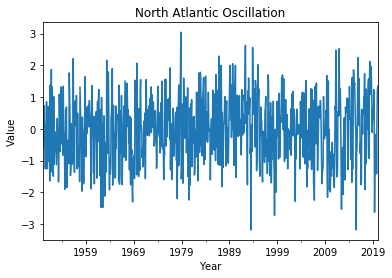

In [7]:
dates = pd.date_range(start = datetime(dfNAO.year.values[0], dfNAO.month.values[0],1), periods = dfNAO.year.shape[0], freq='M')
NAO = pd.Series(dfNAO.NAOValue.values, index=dates)
NAO.plot()

pl.title('North Atlantic Oscillation')
pl.xlabel('Year')
pl.ylabel('Value')

In [8]:
aonao = pd.DataFrame({'AO' : AO, 'NAO' : NAO})
aonao.head()

,AO,NAO
1950-01-31,-0.060310,0.92
1950-02-28,0.626810,0.40
1950-03-31,-0.008128,-0.36
1950-04-30,0.555100,0.73
1950-05-31,0.071577,-0.59


array([<matplotlib.axes._subplots.AxesSubplot object at 0x11595c650>,
      dtype=object)

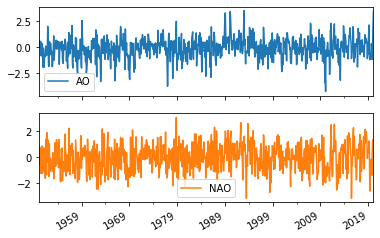

In [9]:
aonao.plot(subplots=True)

We can add new columns to our new DataFrame

In [10]:
aonao['Diff'] = aonao.AO - aonao.NAO
aonao.head()

,AO,NAO,Diff
1950-01-31,-0.060310,0.92,-0.980310
1950-02-28,0.626810,0.40,0.226810
1950-03-31,-0.008128,-0.36,0.351872
1950-04-30,0.555100,0.73,-0.174900
1950-05-31,0.071577,-0.59,0.661577


And when we're done, we can delete it:

In [11]:
del aonao['Diff']
aonao.head()

,AO,NAO
1950-01-31,-0.060310,0.92
1950-02-28,0.626810,0.40
1950-03-31,-0.008128,-0.36
1950-04-30,0.555100,0.73
1950-05-31,0.071577,-0.59


Also, we can get summary statistics using 'describe'

In [12]:
aonao.describe()

,AO,NAO
count,842.000000,841.000000
mean,-0.099993,-0.002171
std,1.009606,1.021176
min,-4.265700,-3.180000
25%,-0.651515,-0.750000
50%,-0.037124,0.060000
75%,0.485400,0.720000
max,3.495300,3.040000


# Resampling

Sometimes, especially when the data has a lot of noise, it's useful to "resample" by time averaging. This is pretty easy as illustrated below

Text(0, 0.5, 'Annual Average')

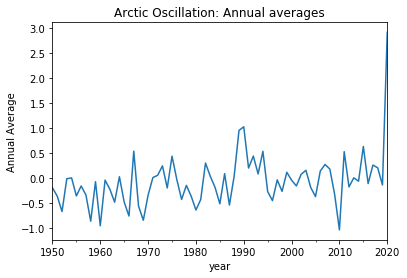

In [13]:
AO_mm = AO.resample('A').mean()  # resample "annually" (A) by taking the mean of each year
AO_mm.plot()
pl.title("Arctic Oscillation: Annual averages")
pl.xlabel("year")
pl.ylabel("Annual Average")

You can also look at max and min annually

Text(0, 0.5, 'Annual Values')

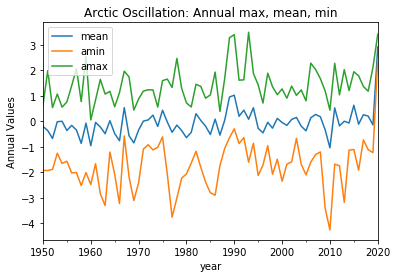

In [14]:
AO_mm = AO.resample("A").apply(['mean', np.min, np.max])
AO_mm.plot()
pl.title("Arctic Oscillation: Annual max, mean, min")
pl.xlabel("year")
pl.ylabel("Annual Values")

Text(0, 0.5, 'Annual Values')

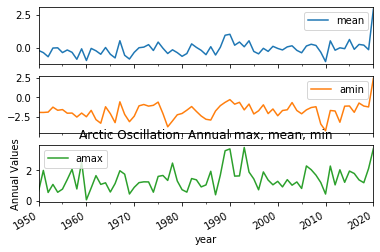

In [15]:
AO_mm.plot(subplots=True) # same idea with subplots
pl.title("Arctic Oscillation: Annual max, mean, min")
pl.xlabel("year")
pl.ylabel("Annual Values")

You can also calculate rolling averages, or correlations

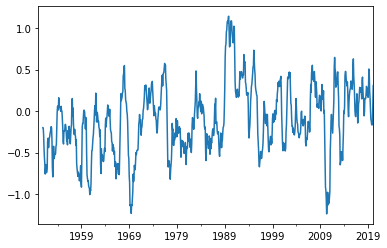

In [16]:
AO.rolling(window=12).mean().plot()

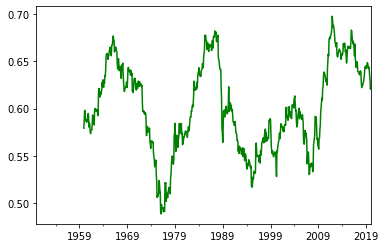

In [17]:
AO.rolling(window=120).corr(other=NAO).plot(style='-g')


 The Pearson correlation coefficient is a measure of 
 the degree to which two random variable vary in the same way

[Wiki Article: https://en.wikipedia.org/wiki/Pearson_correlation_coefficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient)


In [18]:
aonao.corr() # display the Pearson correlation between AO and NAO

,AO,NAO
AO,1.000000,0.605904
NAO,0.605904,1.000000


Stats Exercise: Find some data on the internet that represents a time series. Apply the same concepts illustrated in this notebook to your data set. It could be weather, finanical, governmental, sports, whatever! Just show me that you can grab some data from the Internet, and analyze it as a time series.